In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sys.path.insert(0, '/Users/coreywalker/Desktop/NOAA/SCANAnalysis/SCAN-scripts/')

In [2]:
from class_driver import Driver
from datasets import SCAN_READ #daily soil moisture data for all scan sites
SCAN_READ

,Date,station,SMN-2.0in,SMN-4.0in,SMN-8.0in,SMN-20.0in,SMN-40.0in,SMS-2.0in,SMS-4.0in,SMS-8.0in,...,STV-2.0in,STV-4.0in,STV-8.0in,STV-20.0in,STV-40.0in,STX-2.0in,STX-4.0in,STX-8.0in,STX-20.0in,STX-40.0in
0,4/24/02,2057:AL:SCAN,14.2,11.9,15.9,NaN,34.9,14.7,12.7,16.6,...,68.660,68.150,65.705,63.988,60.980,76.10,73.58,67.64,64.22,60.98
1,4/25/02,2057:AL:SCAN,13.5,11.6,15.4,NaN,34.8,14.5,11.8,16.0,...,66.552,67.168,66.102,64.302,61.032,70.88,70.16,67.46,64.40,61.16
2,4/26/02,2057:AL:SCAN,13.1,11.3,15.3,33.7,34.6,13.5,11.6,15.4,...,58.370,59.870,62.142,63.575,61.160,60.26,62.78,65.30,64.22,61.16
3,4/27/02,2057:AL:SCAN,13.1,11.4,15.0,NaN,34.5,13.2,11.5,15.5,...,62.510,62.232,61.025,62.008,61.018,69.80,67.64,63.32,62.60,61.16
4,4/28/02,2057:AL:SCAN,13.3,11.3,14.4,NaN,34.4,13.5,11.5,15.0,...,68.180,67.408,64.198,62.308,60.740,73.22,71.24,66.20,62.78,60.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79218,10/12/19,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79219,3/28/20,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79220,5/31/20,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79221,9/21/19,2176:AL:SCAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#instantiate a driver object with data
obj = Driver(SCAN_READ)

#calculate the soil moisture mean by month dataframe
obj.mean_soil_moisture_by_month()

#get the standard deviation by month dataframe
obj.standard_deviation_by_month()

#create a column for months in the stations dataframe
obj.get_month_from_dates()

#merge stdev, mean and stations dataframe together
obj.merge_station_stdev_mean()

#calculate the z_scores for each of the observations in the merged dataframe
obj.z_score()

#calculate the data quality based on z_score
obj.quality_z_score(std=3.5)

#clean the data and remove data that is outside the 3.5 standard deviation limit
obj.clean_data()

#resample the SMS data and return 1w and store in resample class
obj.soil_moisture_one_week_resample()

#append the soils to SMS dataframes
obj.create_1w_soil_columns()

#merge with ALEXI
obj.merge_1w_soil_resample_with_ALEXI()



Calculating Monthly Mean for 2057:AL:SCAN
Calculating Monthly Mean for 2078:AL:SCAN
Calculating Monthly Mean for 2177:AL:SCAN
Calculating Monthly Mean for 2113:AL:SCAN
Calculating Monthly Mean for 2174:AL:SCAN
Calculating Monthly Mean for 2055:AL:SCAN
Calculating Monthly Mean for 2173:AL:SCAN
Calculating Monthly Mean for 2180:AL:SCAN
Calculating Monthly Mean for 2114:AL:SCAN
Calculating Monthly Mean for 2178:AL:SCAN
Calculating Monthly Mean for 2181:AL:SCAN
Calculating Monthly Mean for 2182:AL:SCAN
Calculating Monthly Mean for 2176:AL:SCAN
Calculating Monthly Mean for 2056:AL:SCAN
Calculating Monthly Mean for 2179:AL:SCAN
Calculating Monthly Mean for 2115:AL:SCAN
Calculating Monthly Mean for 2175:AL:SCAN
Calculating Monthly Mean for 2053:AL:SCAN


Done!


Calculating Monthly Standard Deviation for 2057:AL:SCAN
Calculating Monthly Standard Deviation for 2078:AL:SCAN
Calculating Monthly Standard Deviation for 2177:AL:SCAN
Calculating Monthly Standard Deviation for 2113:AL:SCAN
Calculat

In [4]:
df = obj.merge1wALEXI #set the merged, clean data to the df object
df.set_index('Date', inplace=True)

In [5]:
smdf = df[['SMS-2.0in','SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in', 'SMS-40.0in', 'station']] #soil moisture only
esidf = df[['ESI', 'station']] #esi data alone

In [6]:
esidf['week']=esidf.index.week #get the week for the esidf
smdf['week']=smdf.index.week

In [7]:
smdf

,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in,station,week
Date,,,,,,,
2002-04-30,13.657143,11.657143,15.300000,33.200000,34.800000,2057:AL:SCAN,18
2002-05-21,23.100000,22.400000,18.914286,33.842857,37.257143,2057:AL:SCAN,21
2002-05-28,19.471429,19.700000,17.642857,33.600000,36.042857,2057:AL:SCAN,22
2002-06-11,11.242857,11.385714,13.671429,29.371429,34.828571,2057:AL:SCAN,24
2002-06-18,15.771429,14.985714,11.842857,25.128571,34.057143,2057:AL:SCAN,25
...,...,...,...,...,...,...,...
2020-12-02,NaN,34.528571,32.000000,34.471429,32.014286,2053:AL:SCAN,49
2020-12-09,NaN,33.371429,32.571429,35.685714,33.657143,2053:AL:SCAN,50
2020-12-16,NaN,33.928571,33.557143,36.171429,35.371429,2053:AL:SCAN,51


In [8]:
weeks = [] #storage for week number
twoInMeans = [] #storage for 2in week mean across clean dataset
fourInMeans = [] #4in 
eightInMeans = [] #8in
twentyInMeans = [] #20in
fortyInMeans = [] #40in
twoInStdev = [] #storage for #2in week stdev across clean dataset
fourInStdev = [] #4in
eightInStdev = [] #8in
twentyInStdev = [] #20in
fortyInStdev = [] #40in
stations = [] #storage for station number

for station in smdf['station'].unique():
    stationFrame = smdf[smdf['station']==station]
    stationFrame['Week']=stationFrame.index.week
    for w in stationFrame['Week'].unique(): #collect the data from each stationframe week
        weekFrame = stationFrame[stationFrame['Week']==w]
        weekMean=weekFrame.mean()
        weekSTDEV = weekFrame.std()
        stations.append(station) 
        weeks.append(w)
        twoInMeans.append(weekMean['SMS-2.0in'])
        fourInMeans.append(weekMean['SMS-4.0in'])
        eightInMeans.append(weekMean['SMS-8.0in'])
        twentyInMeans.append(weekMean['SMS-20.0in'])
        fortyInMeans.append(weekMean['SMS-40.0in'])
        twoInStdev.append(weekSTDEV['SMS-2.0in'])
        fourInStdev.append(weekSTDEV['SMS-4.0in'])
        eightInStdev.append(weekSTDEV['SMS-8.0in'])
        twentyInStdev.append(weekSTDEV['SMS-20.0in'])
        fortyInStdev.append(weekSTDEV['SMS-40.0in'])
        
#build a week statistics dataframe from collected data
SMStatsFrame = pd.DataFrame()
SMStatsFrame['station'] = stations
SMStatsFrame['week']=weeks
SMStatsFrame['2inAllWeeksMean']=twoInMeans
SMStatsFrame['4inAllWeeksMean']=fourInMeans
SMStatsFrame['8inAllWeeksMean']=eightInMeans
SMStatsFrame['20inAllWeeksMean']=twentyInMeans
SMStatsFrame['40inAllWeeksMean']=fortyInMeans
SMStatsFrame['2inAllWeeksSTDev']=twoInStdev
SMStatsFrame['4inAllWeeksSTDev']=fourInStdev
SMStatsFrame['8inAllWeeksSTDev']=eightInStdev
SMStatsFrame['20inAllWeeksSTDev']=twentyInStdev
SMStatsFrame['40inAllWeeksSTDev']=fortyInStdev

In [9]:
SMStatsFrame

,station,week,2inAllWeeksMean,4inAllWeeksMean,8inAllWeeksMean,20inAllWeeksMean,40inAllWeeksMean,2inAllWeeksSTDev,4inAllWeeksSTDev,8inAllWeeksSTDev,20inAllWeeksSTDev,40inAllWeeksSTDev
0,2057:AL:SCAN,18,28.088571,31.637143,33.290179,40.914286,41.443750,7.845233,7.658785,7.388280,3.700634,4.156727
1,2057:AL:SCAN,21,25.271429,30.109524,31.905714,40.066964,40.179464,6.212809,5.682461,7.632516,3.676706,4.402365
2,2057:AL:SCAN,22,21.144381,25.857143,29.177551,39.066667,39.440635,7.125669,6.334502,7.460758,3.792034,3.816905
3,2057:AL:SCAN,24,20.712245,24.122449,27.627473,37.609184,38.660204,6.212783,7.577115,8.404165,5.122725,4.389971
4,2057:AL:SCAN,25,20.164835,25.341758,30.905495,38.256044,39.209890,5.953441,6.977343,8.458230,6.246336,5.717066
...,...,...,...,...,...,...,...,...,...,...,...,...
947,2053:AL:SCAN,34,19.054545,26.025397,19.301429,20.908631,33.085714,8.791396,7.476827,7.830907,7.963758,5.815592
948,2053:AL:SCAN,40,20.939626,26.733187,22.156190,24.288605,32.541071,8.631904,5.887794,7.273977,8.697681,4.194232
949,2053:AL:SCAN,45,25.208036,30.280000,24.106723,24.648762,34.069388,8.377466,6.514529,6.155939,10.172391,3.560938
950,2053:AL:SCAN,53,37.550000,36.404762,35.042857,36.685714,40.476190,0.595990,1.690329,1.039623,6.246191,0.224214


In [10]:
#merge the clean esidf with statsframe
smdf.reset_index(inplace=True)
smdfmerged = pd.merge(SMStatsFrame, smdf, on=['station', 'week'])

In [11]:
#calculate all anomalies
smdfmerged['2inANOM']=(smdfmerged['SMS-2.0in']-smdfmerged['2inAllWeeksMean'])/smdfmerged['2inAllWeeksSTDev']
smdfmerged['4inANOM']=(smdfmerged['SMS-4.0in']-smdfmerged['4inAllWeeksMean'])/smdfmerged['4inAllWeeksSTDev']
smdfmerged['8inANOM']=(smdfmerged['SMS-8.0in']-smdfmerged['8inAllWeeksMean'])/smdfmerged['8inAllWeeksSTDev']
smdfmerged['20inANOM']=(smdfmerged['SMS-20.0in']-smdfmerged['20inAllWeeksMean'])/smdfmerged['20inAllWeeksSTDev']
smdfmerged['40inANOM']=(smdfmerged['SMS-40.0in']-smdfmerged['40inAllWeeksMean'])/smdfmerged['40inAllWeeksSTDev']

In [12]:
#reset esi df
esidf.reset_index(inplace=True)

In [13]:
SMAnomalyFrame = smdfmerged[['Date','station', 'week', '2inANOM', '4inANOM', '8inANOM', '20inANOM', '40inANOM']] #reduce dataframe
SMAnomalyFrame

,Date,station,week,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
0,2002-04-30,2057:AL:SCAN,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
1,2003-04-30,2057:AL:SCAN,18,-0.049530,-0.846087,-1.574525,-2.111607,-0.285467
2,2004-04-29,2057:AL:SCAN,18,0.236358,-0.663291,-0.369915,1.420606,0.480933
3,2005-05-07,2057:AL:SCAN,18,0.478544,0.079088,0.297165,0.451660,0.511864
4,2006-05-07,2057:AL:SCAN,18,NaN,NaN,-0.727624,0.548169,1.085804
...,...,...,...,...,...,...,...,...
9669,2013-07-16,2053:AL:SCAN,29,0.849514,1.109252,0.466453,-1.219342,0.720741
9670,2014-07-16,2053:AL:SCAN,29,-0.525314,-0.764104,-0.464014,NaN,-0.089454
9671,2016-07-22,2053:AL:SCAN,29,0.031796,-0.975972,-0.592587,0.418481,-2.131554
9672,2017-07-23,2053:AL:SCAN,29,1.372291,0.536838,0.593335,1.034148,0.638955


In [14]:
finalFrame = pd.merge(esidf, SMAnomalyFrame, on=['Date','station'])

In [15]:
finalFrame

,Date,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
0,2002-04-30,-0.527,2057:AL:SCAN,18,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
1,2002-05-21,1.565,2057:AL:SCAN,21,21,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807
2,2002-05-28,1.484,2057:AL:SCAN,22,22,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192
3,2002-06-11,0.419,2057:AL:SCAN,24,24,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815
4,2002-06-18,1.374,2057:AL:SCAN,25,25,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292
...,...,...,...,...,...,...,...,...,...,...
9669,2020-12-02,1.522,2053:AL:SCAN,49,49,NaN,-0.038652,0.551961,0.416028,-1.223196
9670,2020-12-09,1.082,2053:AL:SCAN,50,50,NaN,-0.628406,0.522642,0.541675,-0.954042
9671,2020-12-16,0.068,2053:AL:SCAN,51,51,NaN,-0.564758,0.286017,0.215204,-0.923545
9672,2020-12-23,0.167,2053:AL:SCAN,52,52,NaN,-0.662174,0.122894,-0.009764,0.495781


In [16]:
finalFrame.set_index('Date', inplace=True)

In [17]:
#normalize anomalies to ESI scale (-3, 3) 
finalFrame['Normalized2inANOM']=(-3-3)*((finalFrame['2inANOM']-finalFrame['2inANOM'].min())/(finalFrame['2inANOM'].max()-finalFrame['2inANOM'].min()))+3
finalFrame['Normalized4inANOM']=(-3-3)*((finalFrame['4inANOM']-finalFrame['4inANOM'].min())/(finalFrame['4inANOM'].max()-finalFrame['4inANOM'].min()))+3
finalFrame['Normalized8inANOM']=(-3-3)*((finalFrame['8inANOM']-finalFrame['8inANOM'].min())/(finalFrame['8inANOM'].max()-finalFrame['8inANOM'].min()))+3
finalFrame['Normalized20inANOM']=(-3-3)*((finalFrame['20inANOM']-finalFrame['20inANOM'].min())/(finalFrame['20inANOM'].max()-finalFrame['20inANOM'].min()))+3
finalFrame['Normalized40inANOM']=(-3-3)*((finalFrame['40inANOM']-finalFrame['40inANOM'].min())/(finalFrame['40inANOM'].max()-finalFrame['40inANOM'].min()))+3

In [18]:
months = []
SMcountsNeg4in = []
SMcountsPos4in = []
ESIcountsNeg4in = []
ESIcountsPos4in = []
for m in finalFrame.index.month.unique():
    monthFrame = finalFrame[finalFrame.index.month==m]
    SMnegativeCount = len(monthFrame[monthFrame['Normalized4inANOM']<0])
    SMpositiveCount = len(monthFrame[monthFrame['Normalized4inANOM']>0])
    ESInegativeCount = len(monthFrame[monthFrame['ESI']<0])
    ESIpositiveCount = len(monthFrame[monthFrame['ESI']>0])
    SMcountsNeg4in.append(SMnegativeCount)
    SMcountsPos4in.append(SMpositiveCount)
    ESIcountsNeg4in.append(ESInegativeCount)
    ESIcountsPos4in.append(ESIpositiveCount)
    months.append(m)
    
countsFrame = pd.DataFrame()
countsFrame['Month']=months
countsFrame['SMNegCounts']=SMcountsNeg4in
countsFrame['SMPosCounts']=SMcountsPos4in
countsFrame['ESINegCounts']=ESIcountsNeg4in
countsFrame['ESIPosCounts']=ESIcountsPos4in

In [19]:
countsFrame.set_index('Month', inplace=True)
countsFrame.sort_index(inplace=True)

<AxesSubplot:xlabel='Month'>

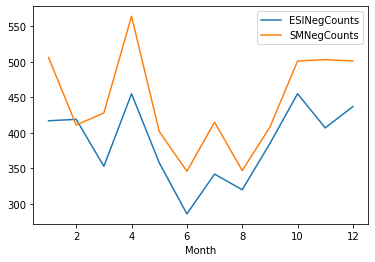

In [20]:
countsFrame[['ESINegCounts','SMNegCounts']].plot()

<AxesSubplot:xlabel='Month'>

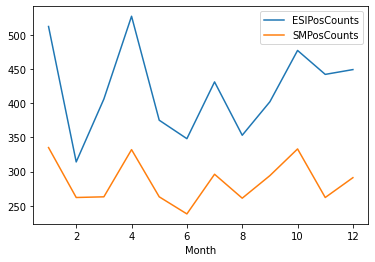

In [21]:
countsFrame[['ESIPosCounts','SMPosCounts']].plot()